## Data science notebooks & data analysis
Notebooks are great for interactive data analysis. Let's create a pandas DataFrame using the `read_csv()` function. 

We will load the dataset "sales_data.csv" containing three months of sales data for the company. We use the `parse_dates` option to ensure that the "date" column is loaded correctly.

By using the `head()` command, we display the first five rows of data:

**Reporting on sales data**
Now let's now move on to the competition and challenge.

**📖 Background**
You work in the accounting department of a company that sells motorcycle parts. The company operates three warehouses in a large metropolitan area.

You’ve recently learned data manipulation and plotting, and suggest helping your colleague analyze past sales data. Your colleague wants to capture sales by payment method. She also needs to know the average unit price for each product line.

## 💾 The data

#### The sales data has the following fields:
- "date" - The date, from June to August 2021.
- "warehouse" - The company operates three warehouses: North, Central, and West.
- "client_type" - There are two types of customers: Retail and Wholesale.
- "product_line" - Type of products purchased.
- "quantity" - How many items were purchased.
- "unit_price" - Price per item sold.
- "total" - Total sale = quantity * unit_price.
- "payment" - How the client paid: Cash, Credit card, Transfer.

In [30]:
# Importing the pandas module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


# Reading in the sales data
df = pd.read_csv("data/sales_data.csv", parse_dates=["date"])

# Take a look at the first datapoints
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


## Data analysis example:

Find the total sales for each warehouse. 

We can use `groupby` to group the information by the column "warehouse". Then we select the column "total" and use `.sum()` to add the "total" column for each warehouse:

In [31]:
df.groupby("warehouse")[["total"]].sum()

,total
warehouse,
Central,141982.88
North,100203.63
West,46926.49


## Data science notebooks & visualizations
Visualizations are very helpful to summarize data and gain insights. A well-crafted chart often conveys information much better than a table.

It is very straightforward to include plots in a data science notebook. For example, let's look at the average number of items purchased by each client type. 

We are using the `matplotlib.pyplot` library for this example. We will run the `.plot()` method on the data we want to display and call `plt.show()` to draw the plot:

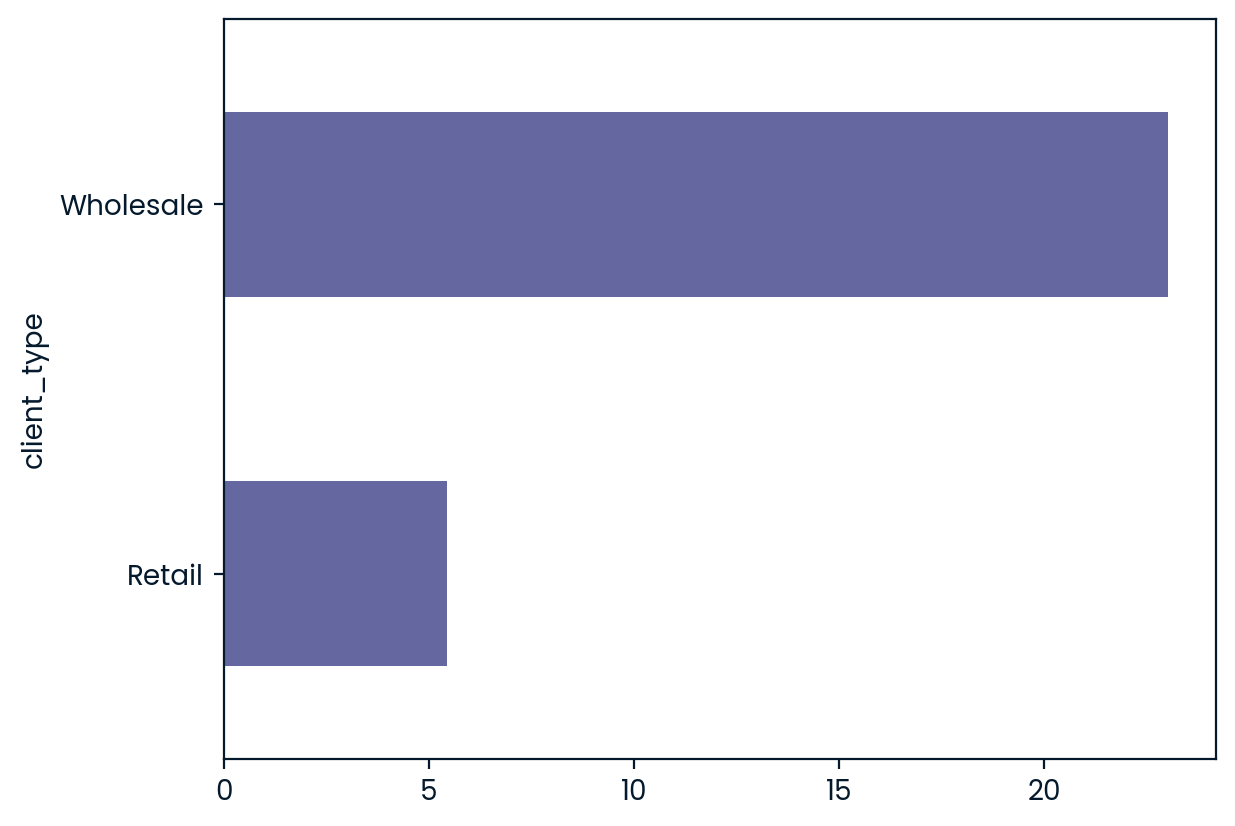

In [32]:
avg_units_client_type = df.groupby("client_type")["quantity"].mean()
avg_units_client_type.plot(kind="barh")
plt.show()

In [33]:
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


In [34]:
df.groupby("payment").sum()

,quantity,unit_price,total
payment,,,
Cash,627,3479.98,19199.10
Credit card,3588,19992.33,110271.57
Transfer,5180,6849.73,159642.33


In [35]:
# calculate the average unit price for each product line 
average_unit_price = df.groupby("product_line")["unit_price"].mean()
#add a column for average price to the dataframe
df["average price"] = df["product_line"].map(average_unit_price)
df.head()


,date,warehouse,client_type,product_line,quantity,unit_price,total,payment,average price
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card,22.810738
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash,17.740522
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card,33.969868
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer,42.832229
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card,60.091803


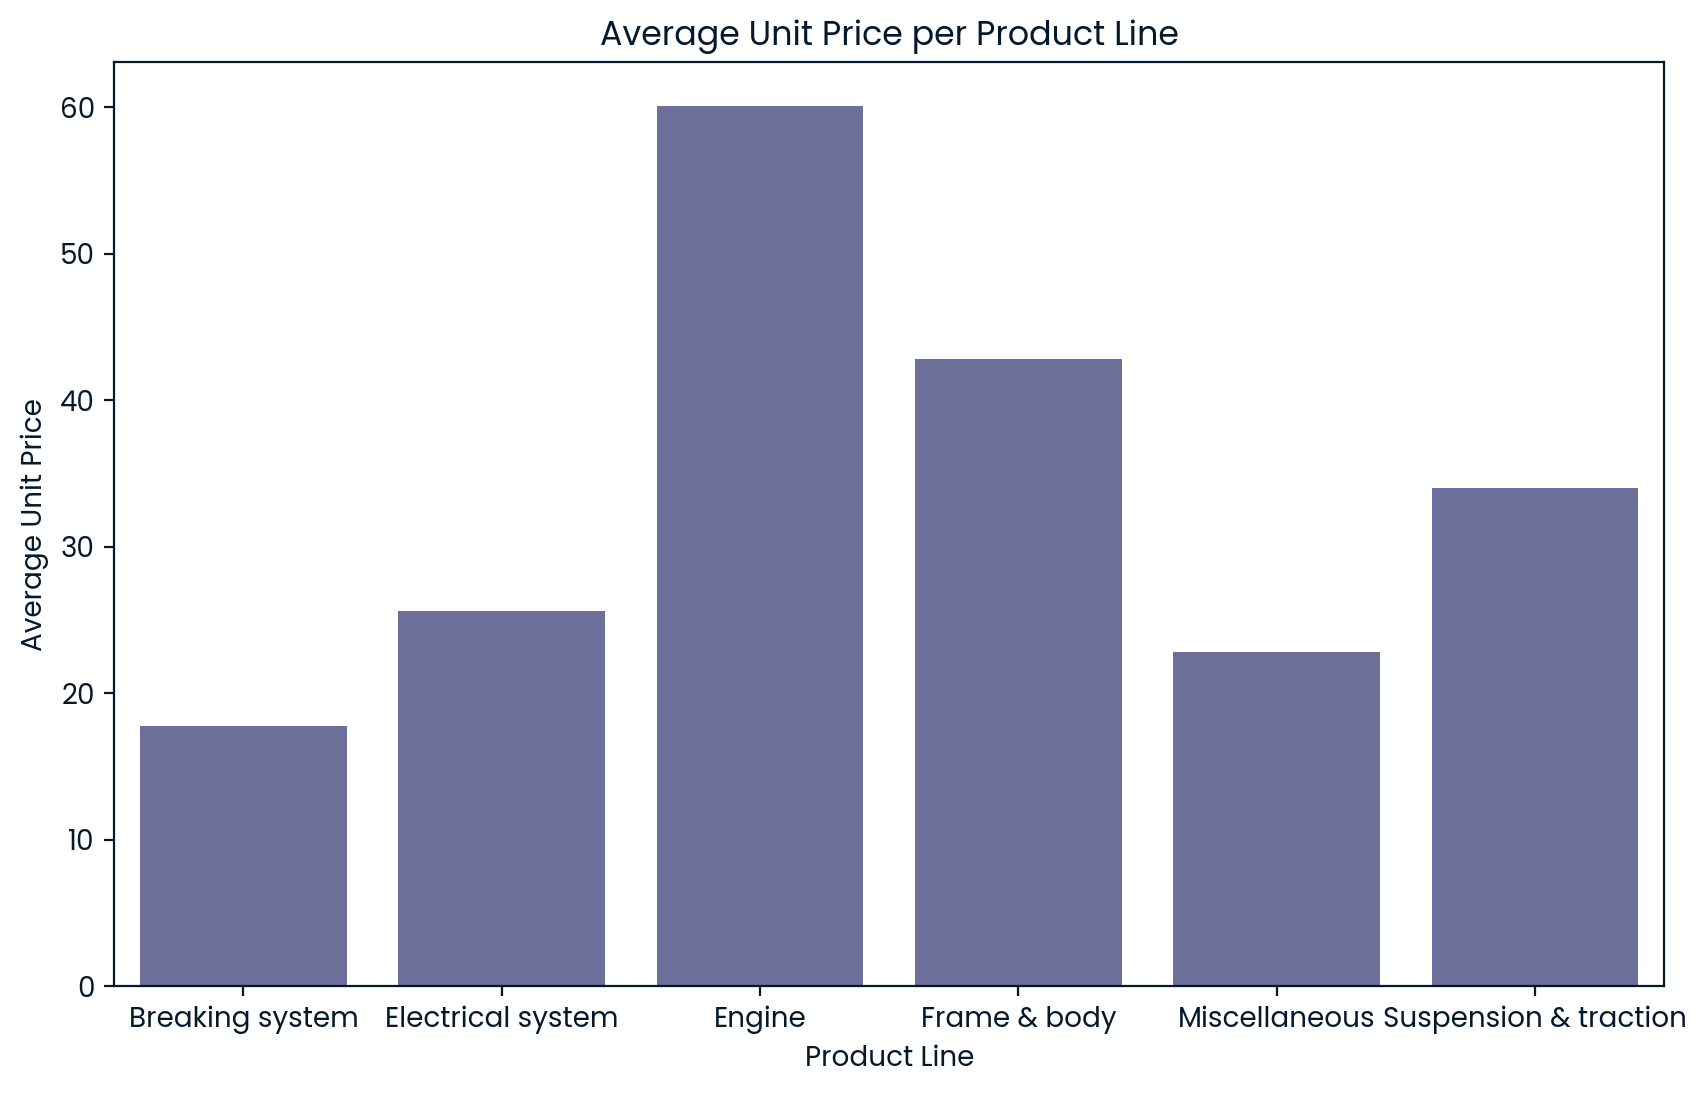

In [36]:

# Bar Plot for Average Unit Price per Product Line
plt.figure(figsize=(10, 6))
sns.barplot(x=average_unit_price.index, y=average_unit_price.values)
plt.title("Average Unit Price per Product Line")
plt.xlabel("Product Line")
plt.ylabel("Average Unit Price")
plt.show()

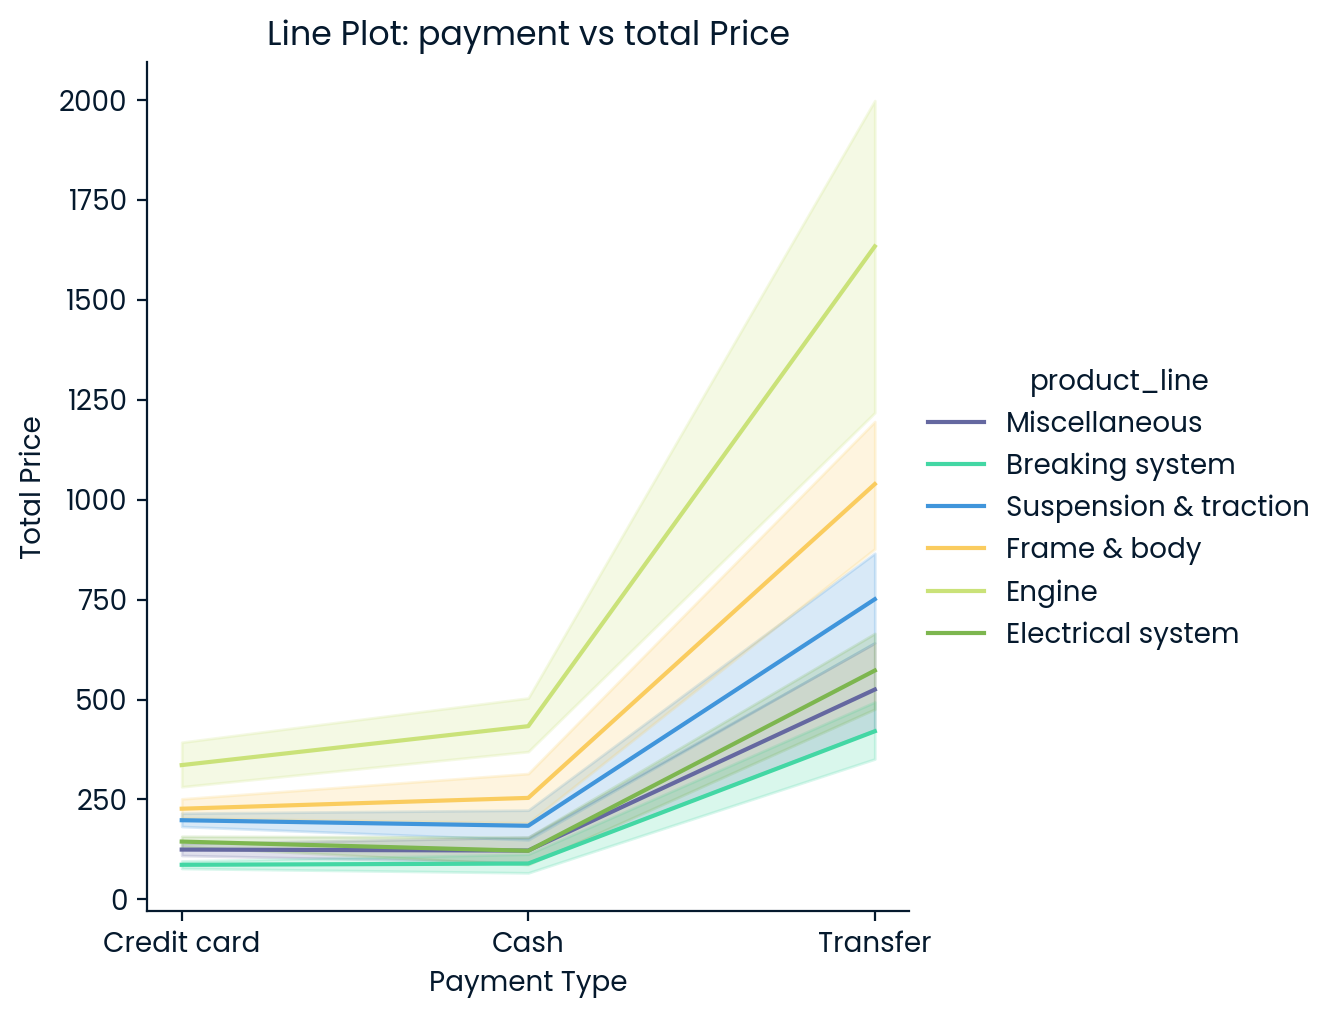

In [37]:
#line plot of payment compared to to total price
sns.relplot(x="payment",y="total", hue="product_line", data=df, kind="line")
plt.title("Line Plot: payment vs total Price")
plt.xlabel("Payment Type")
plt.ylabel("Total Price")
plt.show()

The line plot above indicates that Transfer is the most used payment method within and between groups.

In [38]:

# Calculate the average purchase value per client type
average_purchase_value = df.groupby("client_type")["total"].mean().reset_index()

# Calculate the total purchase value per product line
total_purchase_value = df.groupby("product_line")["total"].sum().reset_index()

# Display the DataFrames
print("Average Purchase Value by Client Type:")
print(average_purchase_value)
print("\nTotal Purchase Value by Product Line:")
print(total_purchase_value)

Average Purchase Value by Client Type:
  client_type       total
0      Retail  167.058929
1   Wholesale  709.521467

Total Purchase Value by Product Line:
            product_line     total
0        Breaking system  38350.15
1      Electrical system  43612.71
2                 Engine  37945.38
3           Frame & body  69024.73
4          Miscellaneous  27165.82
5  Suspension & traction  73014.21


Average Purchase Value by Client Type: This analysis helps us understand the spending behavior of different client types (Retail vs. Wholesale).

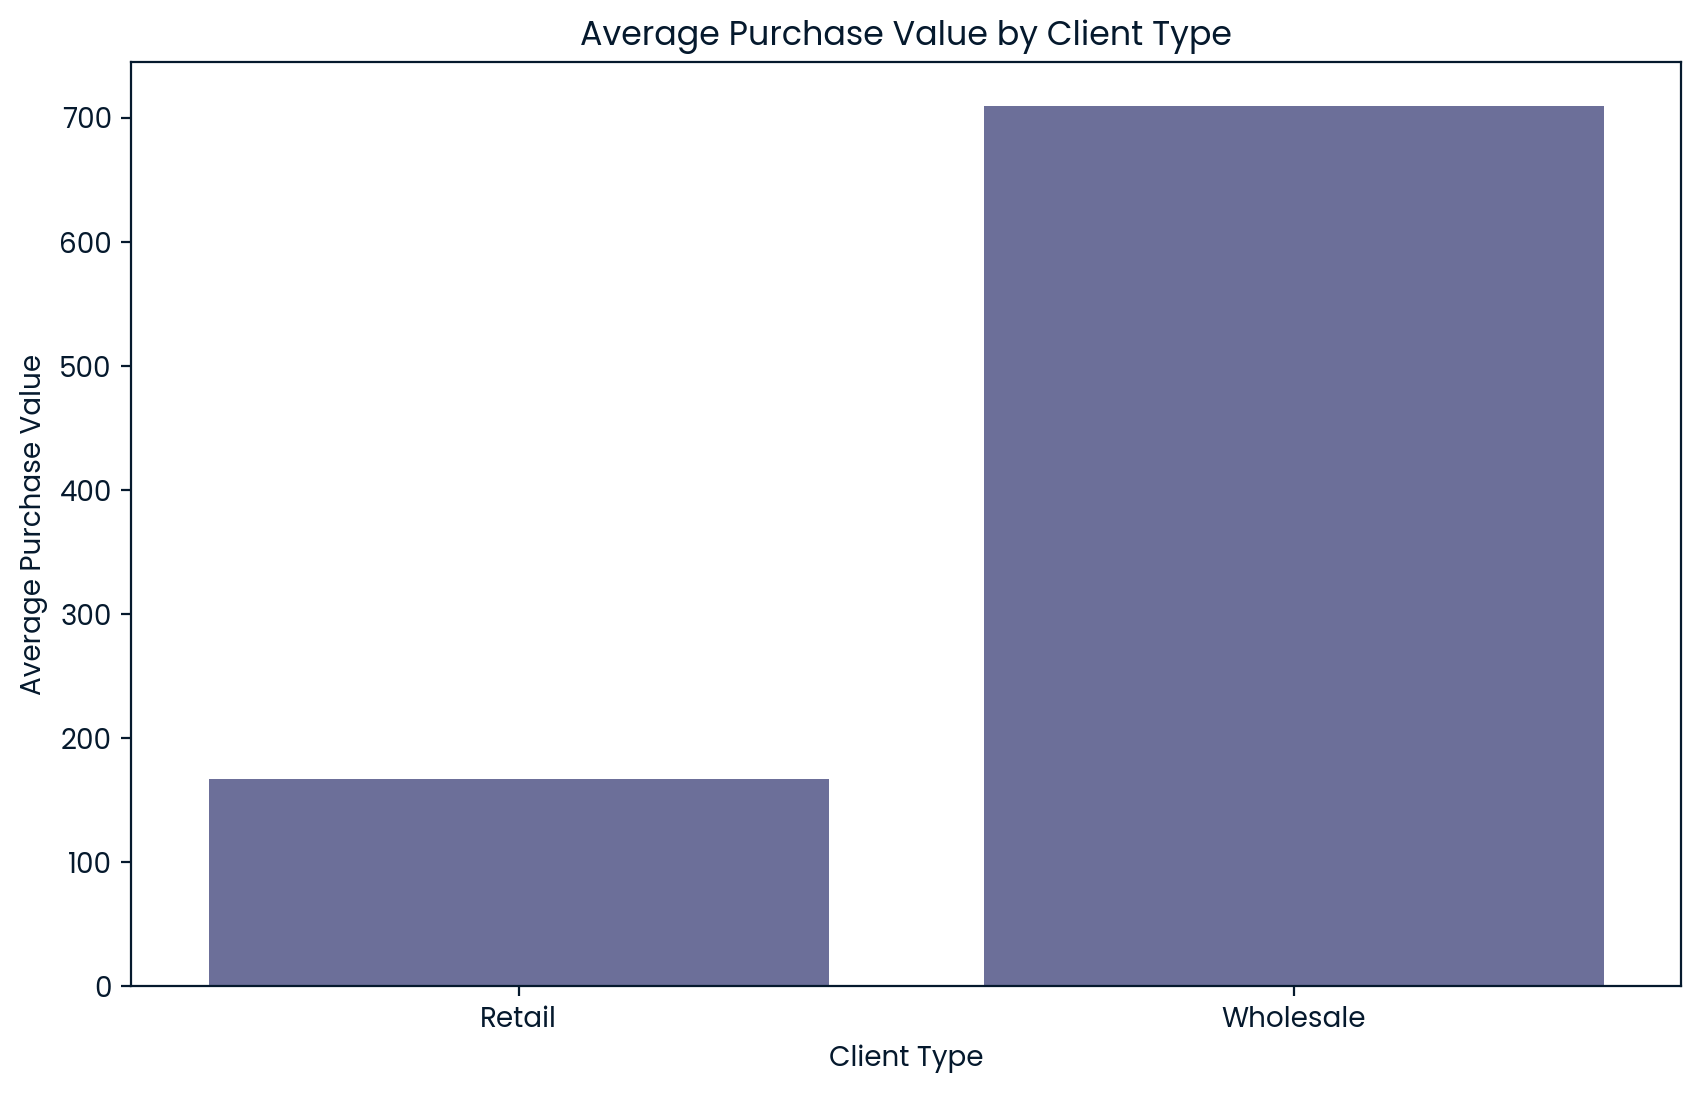

In [39]:
# Bar Plot for Average Purchase Value by Client Type
plt.figure(figsize=(10, 6))
sns.barplot(x="client_type", y="total", data=average_purchase_value)
plt.title("Average Purchase Value by Client Type")
plt.xlabel("Client Type")
plt.ylabel("Average Purchase Value")
plt.show()


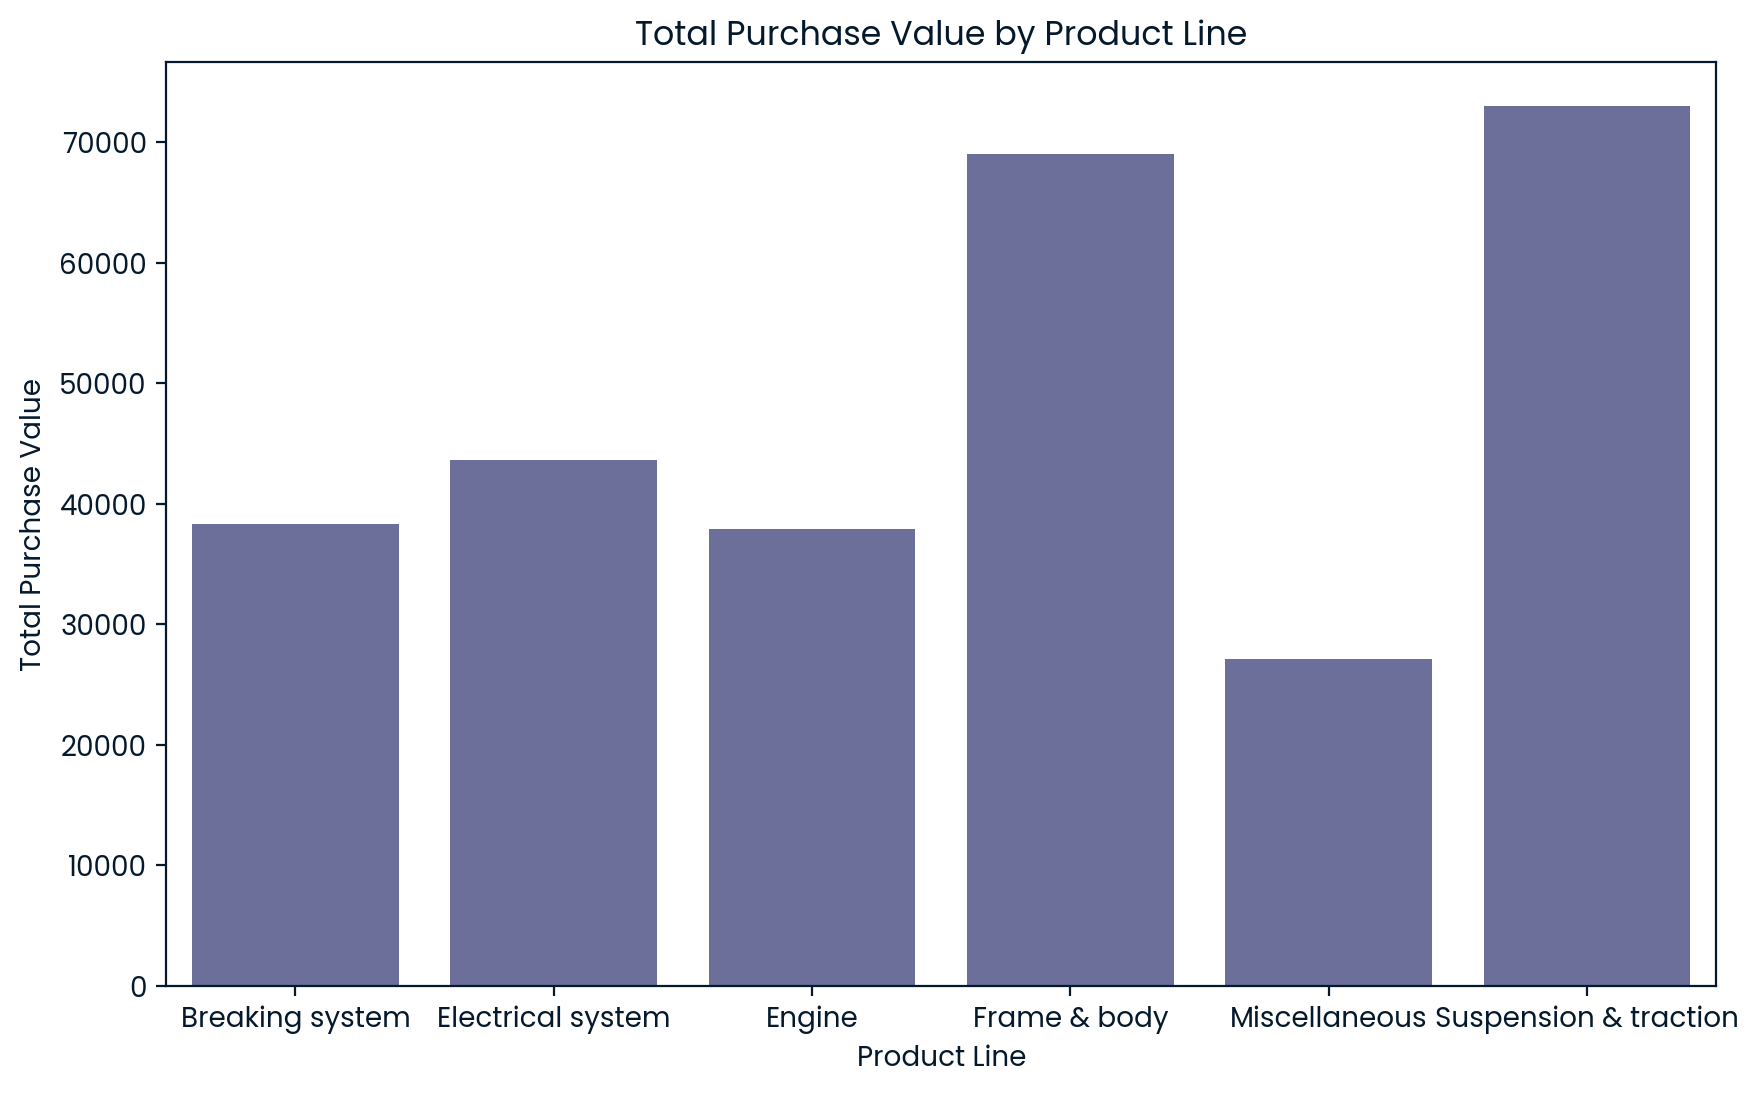

In [40]:
# Bar Plot for Total Purchase Value by Product Line
plt.figure(figsize=(10, 6))
sns.barplot(x="product_line", y="total", data=total_purchase_value)
plt.title("Total Purchase Value by Product Line")
plt.xlabel("Product Line")
plt.ylabel("Total Purchase Value")
plt.show()


Total Purchase Value by Product Line: The analysis above helps us identify which product lines generate the most revenue.
And it is obviously Suspension & traction brings in the most revenue, followed closely by frame & body

**Findings Summary**
Based on the analyses performed on the sample dataset, here are the key insights:
- We calculated the average unit price for each product line and added this information to the DataFrame as a new column. The Engine has the highest unit price followed by Frame & body.
-  The Average Purchase Value by Client Type shows that Wholesale clients tend to have higher average purchase values compared to Retail clients, indicating that Wholesale clients might be making bulk purchases or buying higher-priced items.
-  Total Purchase Value by Product Line indicate that Suspension & Traction are highest followed by Body and Frame. 
-  The Engine is the most expensive product line but doesn't generates the highest total revenue.
-  Braking system has the lowest average unit price while Miscellaneous generates the lowest total revenue among the product lines.
- Finally, the payment type analyses indicate that Transfer is the most used payment method within and between groups.
   

**STATISTICAL MODEL**

I built a statistical model to analyze the relationship between different variables in the Sales dataset, using regression analysis. Specifically, I'll use linear regression to understand how various factors such as unit_price, quantity, and client_type affect the purchase_value

In [41]:
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment,average price
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card,22.810738
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash,17.740522
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card,33.969868
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer,42.832229
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card,60.091803


In [42]:
# Encode categorical variable 'client_type' using one-hot encoding
df = pd.get_dummies(df, columns=["client_type"], drop_first=True)
# Define the independent variables (X) and the dependent variable (y)
X = df[["unit_price", "quantity", "client_type_Wholesale"]]
y = df['total']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Build the OLS regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     2308.
Date:                Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                        13:53:08   Log-Likelihood:                -6226.0
No. Observations:                1000   AIC:                         1.246e+04
Df Residuals:                     996   BIC:                         1.248e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -290.98

**INTERPRETATIONS**

The regression model output with the client_type_Wholesale variable included provides insights into the relationship between the independent variables (unit_price, quantity, and client_type_Wholesale) and the dependent variable (total). Here's a summary of the key points:

1. Coefficients:
- The intercept coefficient is not directly interpretable in this context.
- The coefficients for unit_price and quantity are statistically significant (p < 0.001), indicating that they have a significant impact on total. Specifically, for each unit increase in unit_price, total is expected to increase by $9.6421, and for each unit increase in quantity, total is expected to increase by $30.5247.
- The coefficient for client_type_Wholesale is not statistically significant (p = 0.768), suggesting that it does not have a significant impact on total.
- Intercept (const): The intercept represents the estimated total when all independent variables are zero. In this case, it indicates the estimated total for retail clients (client_type_Retail) when unit_price and quantity are zero. The intercept is -290.9862, _but its interpretation is **not meaningful** since it's highly unlikely to have zero unit_price and quantity._

2. Model Fit:

- The R-squared value (0.874) indicates that approximately 87.4% of the variance in total is explained by the independent variables included in the model.
- The F-statistic (2308.0) is highly significant (p < 0.001), indicating that the overall model is statistically significant.

3. Goodness-of-Fit Measures:

- The AIC value (12460) and BIC value (12480) provide measures of the model's goodness-of-fit and penalize model complexity. Lower values indicate better fitting models.

4. Interpretation:

- While the model overall is significant and explains a substantial portion of the variance in total, the inclusion of client_type_Wholesale does not significantly improve the model's predictive power. The coefficient for client_type_Wholesale is not statistically significant, suggesting that it does not contribute meaningfully to explaining the variation in total.


## 💪 Challenge
Create a report to answer your colleague's questions. Include:

1. What are the total sales for each payment method?
2. What is the average unit price for each product line?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Investigate further (e.g., average purchase value by client type, total purchase value by product line, etc.)
5. Summarize your findings.